In [1]:
import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data collection

In [69]:
df = pd.read_csv("Project 2_Dataset",names = ["Date","state","id","latitude","longitude"])
df.head()

,Date,state,id,latitude,longitude
0,2014-03-15:10:10:20,Sorrento,8cc3b47e-bd01-4482-b500-28f2342679af,33.689475,-117.543308
1,2014-03-15:10:10:20,MeeToo,ef8c7564-0a1a-4650-a655-c8bbd5f8f943,37.432109,-121.485030
2,2014-03-15:10:10:20,MeeToo,23eba027-b95a-4729-9a4b-a3cca51c5548,39.437891,-120.938978
3,2014-03-15:10:10:20,Sorrento,707daba1-5640-4d60-a6d9-1d6fa0645be0,39.363519,-119.400335
4,2014-03-15:10:10:20,Ronin,db66fe81-aa55-43b4-9418-fc6e7a00f891,33.191358,-116.448243


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459540 entries, 0 to 459539
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       459540 non-null  object 
 1   state      459540 non-null  object 
 2   id         459540 non-null  object 
 3   latitude   459540 non-null  float64
 4   longitude  459540 non-null  float64
dtypes: float64(2), object(3)
memory usage: 17.5+ MB


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,latitude,longitude
latitude,1.000000,-0.956411
longitude,-0.956411,1.000000


In [70]:
df = df[["latitude","longitude"]]

In [61]:
df.head()

,latitude,longitude
0,33.689475,-117.543308
1,37.432109,-121.485030
2,39.437891,-120.938978
3,39.363519,-119.400335
4,33.191358,-116.448243


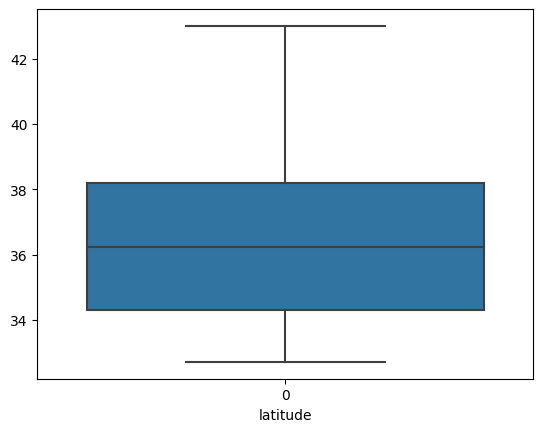

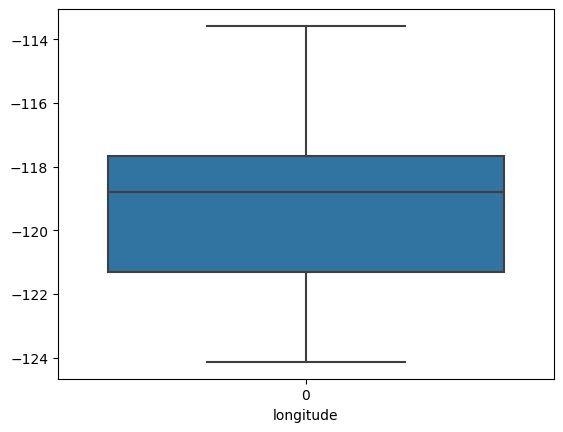

In [78]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    
    plt.show()

In [77]:
df = df[(df["latitude"]<43)&(df["longitude"]<-20)&(df["longitude"]<-113)]

/home/datahagward/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/datahagward/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/datahagward/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/datahagward/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/datahagwar

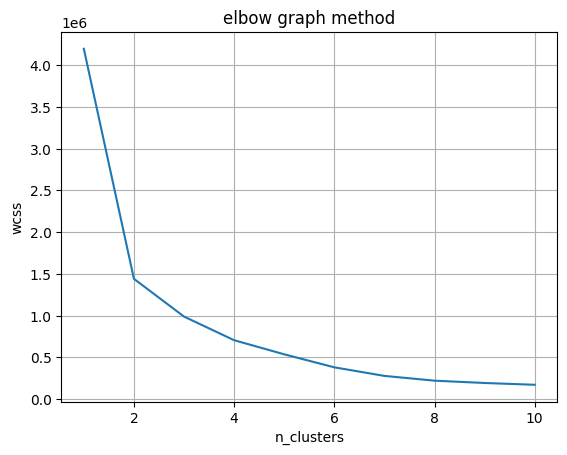

In [79]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
    model = KMeans(n_clusters=i,init="k-means++")
    model.fit(df)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("n_clusters")
plt.ylabel("wcss")
plt.title("elbow graph method")
plt.grid(True)
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(df,test_size=.2,shuffle=True,random_state=2)

In [81]:
x_train.shape

(291390, 2)

In [82]:
x_test.shape

(72848, 2)

In [116]:
model = KMeans(n_clusters=2,init="k-means++")
model.fit(x_train)

/home/datahagward/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [127]:
labels = model.labels_

In [118]:
centers = model.cluster_centers_

In [119]:
centers

array([[  34.68661477, -117.32572099],
       [  38.56802292, -121.25271843]])

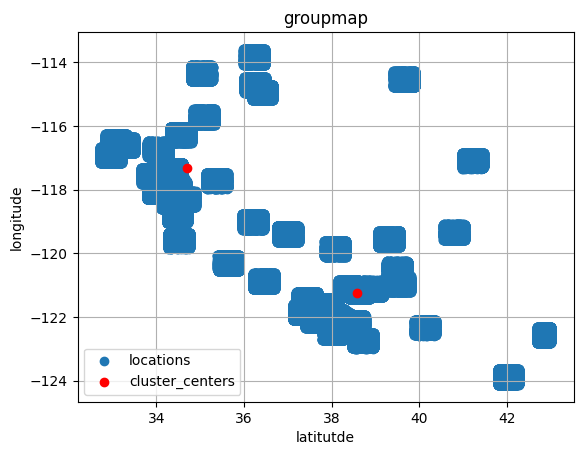

In [139]:
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],label="locations")
plt.scatter(centers[:,0],centers[:,1],label="cluster_centers",color="r")
plt.title("groupmap")
plt.xlabel("latitutde")
plt.ylabel("longitude")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [138]:
y_pred = model.predict(x_test)

In [122]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

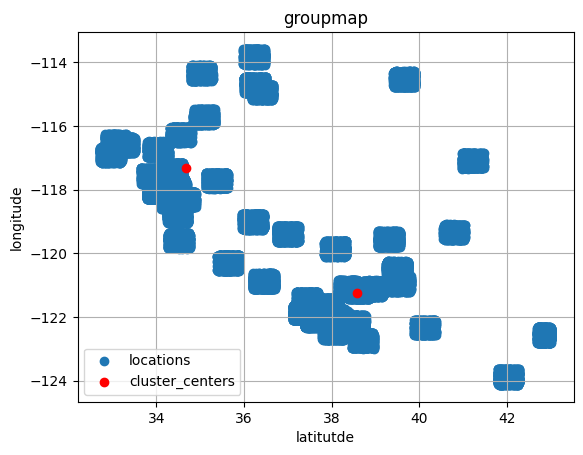

In [140]:
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],label="locations")
plt.scatter(centers[:,0],centers[:,1],label="cluster_centers",color="r")
plt.title("groupmap")
plt.xlabel("latitutde")
plt.ylabel("longitude")
plt.legend(loc="best")
plt.grid(True)
plt.show()